In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 6.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f3521e5e2ed622993f71c1724fe772886f6d5453cfd91d4fdcf48a6f3a0a27ad
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [5]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [9]:
print("학습 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test))) # 과소적합(Underfitting)

학습 세트 점수: 0.67
테스트 세트 점수: 0.66


In [11]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [12]:
print("학습 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

학습 세트 점수: 0.95
테스트 세트 점수: 0.61


### 리지 회귀 : L2 regularization(규제) 사용해서 Overfitting 방지

In [13]:
from sklearn.linear_model import Ridge

In [15]:
ridge = Ridge().fit(X_train, y_train)
print("학습 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test))) # LinearRegression보다 Overfitting이 덜한 결과

학습 세트 점수: 0.89
테스트 세트 점수: 0.75


alpha값을 높이면 계수를 0에 더 가깝게 만들어서 학습 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.

In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("학습 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

학습 세트 점수: 0.79
테스트 세트 점수: 0.64


반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리고 아주 작은 값으로 할 경우 LinearRegressionㅇ로 만든 모델과 거의 같아진다

In [18]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

학습 세트 점수: 0.93
테스트 세트 점수: 0.77


시각화

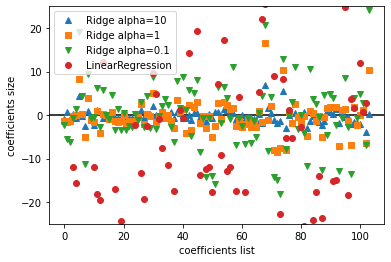

In [19]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("coefficients list")
plt.ylabel("coefficients size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

학습 곡선(Learning Curve) : 데이터셋 크기에 따른 모델의 성능 변화를 나타낸 그래프

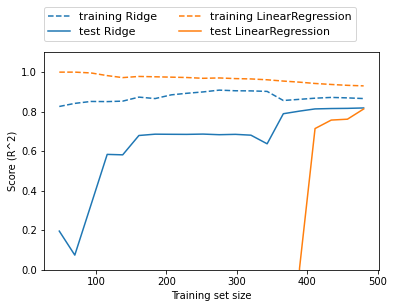

In [20]:
mglearn.plots.plot_ridge_n_samples() # 데이터 수가 충분해지면 규제 항은 덜 중요해져서 선형 회귀와 리지 회귀 성능이 비슷해진다.

### 라소(Lasso) : L1 규제 사용, 라소를 사용할 때 어떤 계수는 0이 되는 경우도 있다. (제외되는 특성 생길 수 있음)

In [21]:
from sklearn.linear_model import Lasso

In [23]:
X_train.shape

(379, 104)

In [22]:
lasso = Lasso().fit(X_train, y_train)
print("학습 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

학습 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [24]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) # 좀 더 많은 특성 사용하기 위해 alpha 값을 줄인다.
print("학습 세트 점수:{:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

학습 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 개수: 33


하지만 alpha값을 너무 낮추면 규제 효과가 없어져서 Overfitting이 될 수 있다.

In [25]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("학습 세트 점수:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

학습 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 개수: 96


시각화 : alpha=1일 때 계수 대부분이 0이고 나머지 계수들도 크기가 작다. alpha=0.0001이 되면 계수 대부분 0이 아니고 값도 커져서 별로 규제받지 않은 모델이 된다

Text(0.5, 0, 'coefficients size')

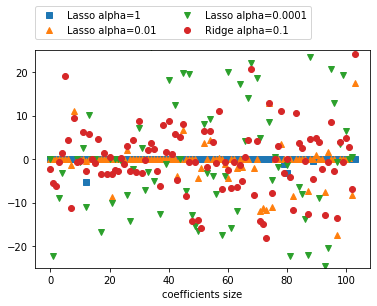

In [26]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coefficients list")
plt.xlabel("coefficients size")